In [144]:
import pandas as pd
import numpy as np
df = pd.read_csv('bank-full.csv')

In [145]:
df.shape

(41188, 21)

In [146]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')
    10 - dayofweek: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [147]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visuals
import seaborn as sns #visuals

from sklearn.preprocessing import StandardScaler #scaler
from sklearn.cluster import KMeans #k-means

from sklearn.decomposition import PCA #pca

In [148]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [149]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [150]:
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [151]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [152]:
subset = ['age', 'job', 'marital', 'education','default', 'housing', 'loan', 'contact','duration', 'campaign']

In [153]:
df[df.duplicated(subset=subset)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
1179,44,technician,married,professional.course,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
4030,32,admin.,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
4348,45,blue-collar,married,basic.9y,unknown,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
5581,45,blue-collar,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40110,33,admin.,single,university.degree,no,yes,no,cellular,jul,mon,...,1,999,1,failure,-1.7,94.215,-40.3,0.827,4991.6,no
40114,73,retired,married,basic.4y,no,yes,no,cellular,jul,tue,...,1,999,0,nonexistent,-1.7,94.215,-40.3,0.835,4991.6,yes
40248,29,admin.,single,university.degree,no,yes,no,cellular,jul,mon,...,2,999,1,failure,-1.7,94.215,-40.3,0.889,4991.6,no
40264,32,admin.,single,university.degree,no,yes,no,cellular,jul,tue,...,1,999,1,failure,-1.7,94.215,-40.3,0.893,4991.6,no


In [154]:
df2 = df.drop_duplicates(subset = subset)

In [155]:
df2.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

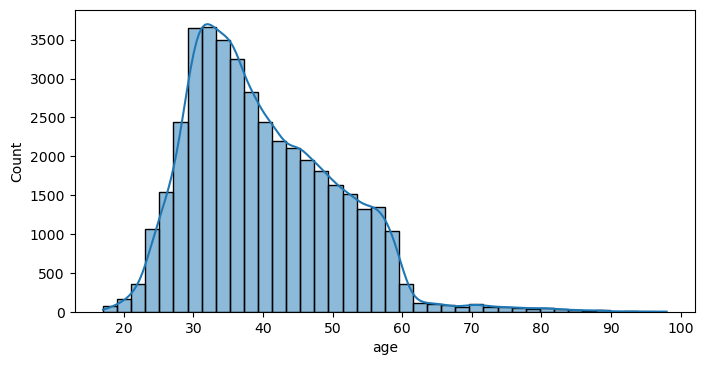

In [156]:
plt.figure(figsize = (8,4), dpi = 100)
#plot a histograme of age
sns.histplot(data = df2, x = 'age', bins = 40, kde = True)
#show the figure
plt.show()

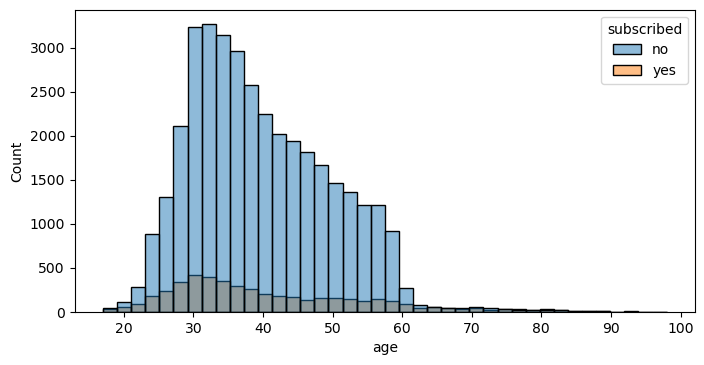

In [157]:
plt.figure(figsize = (8,4), dpi = 100) 
#plot a histograme of age
sns.histplot(data = df2, x = 'age', bins = 40, hue = 'subscribed')
#show the figure
plt.show()

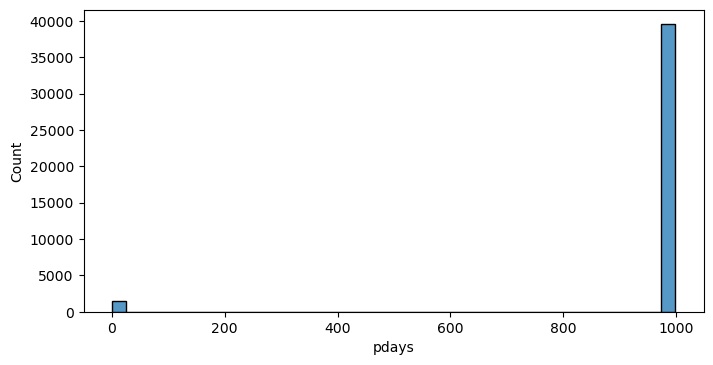

In [158]:
plt.figure(figsize = (8,4), dpi = 100) 
#plot a histograme of age
sns.histplot(data = df2, x = 'pdays', bins = 40)
#show the figure
plt.show()

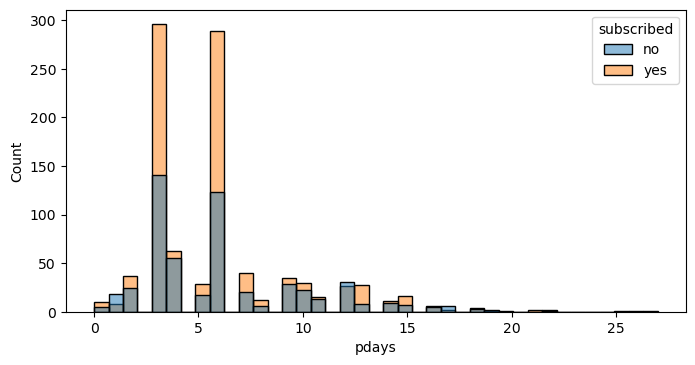

In [159]:
#intiate a figure 
plt.figure(figsize = (8,4), dpi = 100)
#filter the dataframe
data = df2[df2.pdays != 999]
#plot a histograme of age
sns.histplot(data = data, x = 'pdays', hue='subscribed')
#show the figure
plt.show()

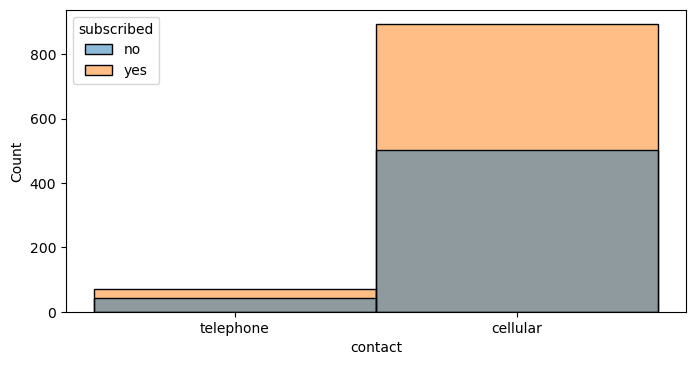

In [205]:
#intiate a figure 
plt.figure(figsize = (8,4), dpi = 100)
#filter the dataframe

sns.histplot(data = data, x = 'contact', hue='subscribed')
#show the figure
plt.show()

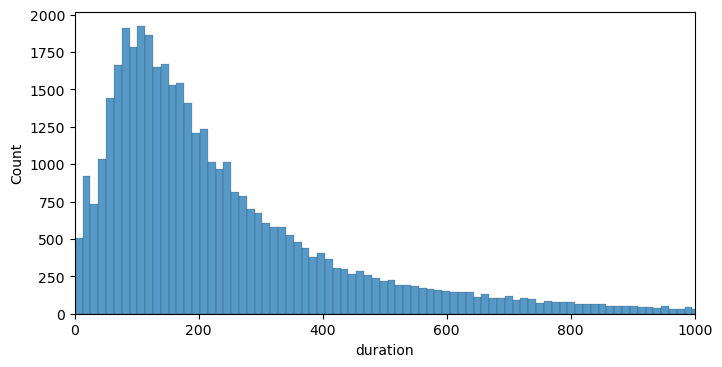

In [161]:
plt.figure(figsize = (8,4), dpi = 100)
#hist plot
sns.histplot(data = df2, x = 'duration')
#x limit
plt.xlim(0,1000)
#show the figure
plt.show()

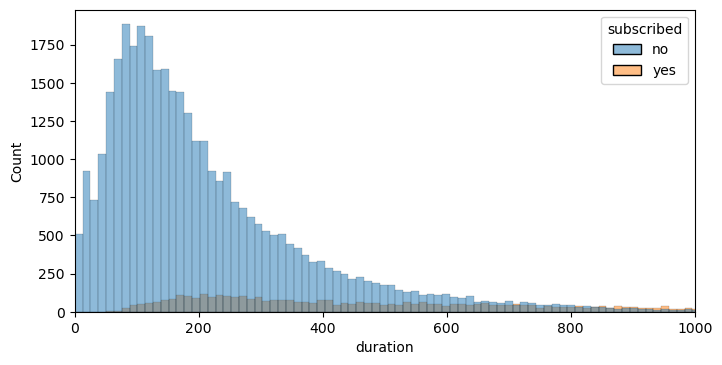

In [162]:
#intiate a figure 
plt.figure(figsize = (8,4), dpi = 100)
#hist plot
sns.histplot(data = df2, x = 'duration', hue = 'subscribed')
#x limit
plt.xlim(0,1000)
#show the figure
plt.show()

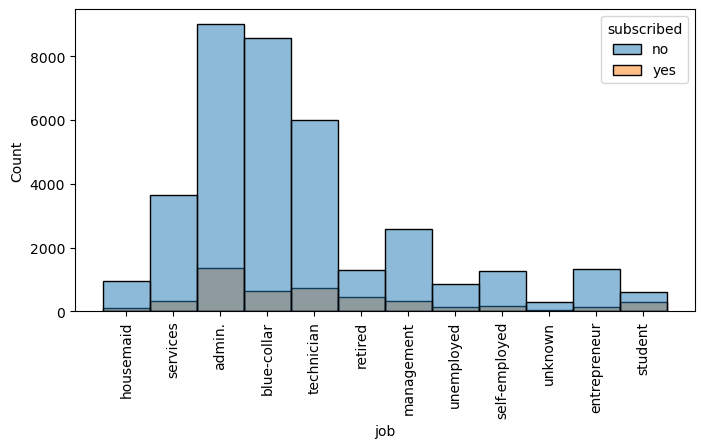

In [163]:
plt.figure(figsize = (8,4), dpi = 100)
#order 
order = df2['job'].value_counts().index
#count plot
sns.histplot(data = df2, x = 'job', hue = 'subscribed')
#rotate xticks 
plt.xticks(rotation = 90)
#show the figure
plt.show()

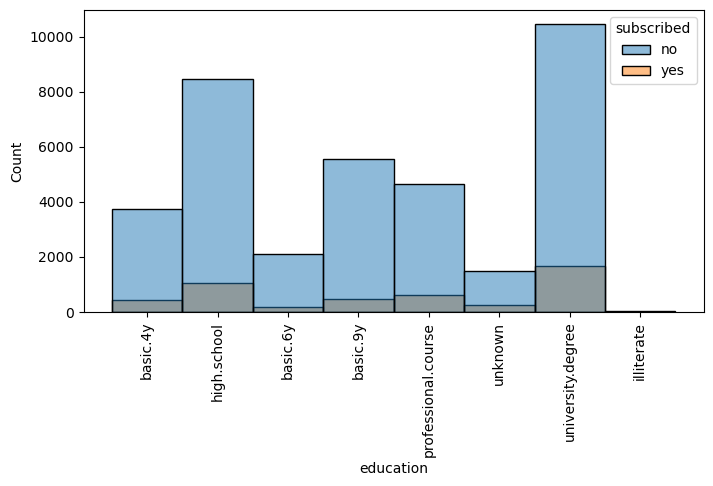

In [164]:
#intiate a figure 
plt.figure(figsize = (8,4), dpi = 100)
#order 
order = df['education'].value_counts().index
#count plot
sns.histplot(data = df2, x = 'education', hue = 'subscribed')
#rotate xticks 
plt.xticks(rotation = 90)
#show the figure
plt.show()


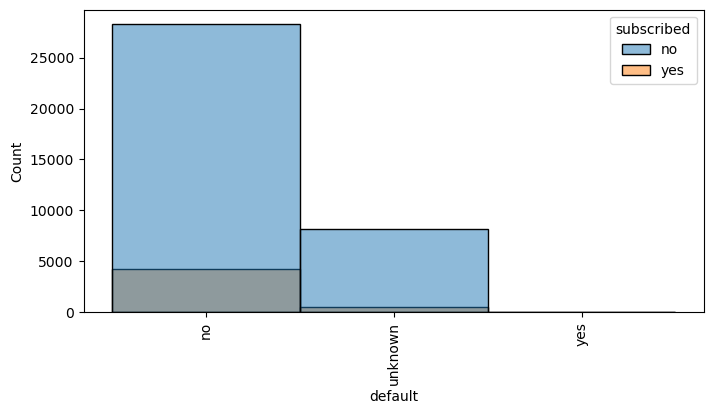

In [165]:
plt.figure(figsize = (8,4), dpi = 100)
#order 
order = df['default'].value_counts().index
#count plot
sns.histplot(data = df2, x = 'default', hue = 'subscribed')
#rotate xticks 
plt.xticks(rotation = 90)
#show the figure
plt.show()

In [166]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

print_unique_col_values(df2)

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome: ['nonexistent' 'failure' 'success']
subscribed: ['no' 'yes']


In [167]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [168]:
def print_unique_col_values_float(df):
       for column in df:
            if df[column].dtypes=='float':
                print(f'{column}: {df[column].unique()}') 

print_unique_col_values_float(df2)

emp.var.rate: [ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
cons.price.idx: [93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]
cons.conf.idx: [-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8]
euribor3m: [4.857 4.856 4.855 4.859 4.86  4.858 4.864 4.865 4.866 4.967 4.961 4.959
 4.958 4.96  4.962 4.955 4.947 4.956 4.966 4.963 4.957 4.968 4.97  4.965
 4.964 5.045 5.    4.936 4.921 4.918 4.912 4.827 4.794 4.76  4.733 4.7
 4.663 4.592 4.474 4.406 4.343 4.286 4.245 4.223 4.191 4.153 4.12  4.076
 4.021 3.901 3.879 3.853 3.816 3.743 3.669 3.563 3.488 3.428 3.329 3.282
 3.053 1.811 1.799 1.778 1.757 1.726 1.703 1.687 1.663 1.65  1.64  1.629
 1.614 1.602 1.584 1.574 1.56  1.556 1.548 1.538 1.531 1.52  1.51  1.498
 1.483 1.479 1.466 1.453 1.445 1.435 

In [169]:
def print_unique_col_values_int(df):
       for column in df:
            if df[column].dtypes=='int':
                print(f'{column}: {df[column].unique()}') 

print_unique_col_values_int(df2)

age: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
duration: [ 261  149  226 ... 1246 1556 1868]
campaign: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
pdays: [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
previous: [0 1 2 3 4 5 6 7]


In [170]:
df2.replace('unknown', np.nan, inplace=True)

/var/folders/8w/snj_8lln2bz87z87f46_k0t00000gn/T/ipykernel_58735/3783016224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace('unknown', np.nan, inplace=True)


In [171]:
df2.isnull().sum()

age                  0
job                330
marital             80
education         1729
default           8584
housing            989
loan               989
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
subscribed           0
dtype: int64

In [172]:
df3=df2.drop(['default','duration'],axis=1) #since they are very indicative of the target variable

In [173]:
df3.dropna(inplace=True)

In [174]:
df3.shape

(38144, 19)

In [175]:
df3.head()



,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [176]:
print_unique_col_values(df3)

job: ['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
marital: ['married' 'single' 'divorced']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']
housing: ['no' 'yes']
loan: ['no' 'yes']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome: ['nonexistent' 'failure' 'success']
subscribed: ['no' 'yes']


In [177]:
jobdummies = pd.get_dummies(df3['job'],drop_first=True)
df3.drop('job', axis=1, inplace = True) #removing redundant column
df3 = pd.concat([df3, jobdummies], axis=1)

maritaldummies = pd.get_dummies(df3['marital'],drop_first=True)
df3.drop('marital', axis=1, inplace = True) #removing redundant column
df3 = pd.concat([df3, maritaldummies], axis=1)


educationdummies = pd.get_dummies(df3['education'],drop_first=True)
df3.drop('education', axis=1, inplace = True) #removing redundant column
df3 = pd.concat([df3, educationdummies], axis=1)

poutcomedummies = pd.get_dummies(df3['poutcome'],drop_first=True)
df3.drop('poutcome', axis=1, inplace = True) #removing redundant column
df3 = pd.concat([df3, poutcomedummies], axis=1)

In [178]:
df3.columns

Index(['age', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'subscribed', 'blue-collar', 'entrepreneur',
       'housemaid', 'management', 'retired', 'self-employed', 'services',
       'student', 'technician', 'unemployed', 'married', 'single', 'basic.6y',
       'basic.9y', 'high.school', 'illiterate', 'professional.course',
       'university.degree', 'nonexistent', 'success'],
      dtype='object')

In [179]:
yes_no_columns=['housing','subscribed','loan']
df3[yes_no_columns]=df3[yes_no_columns].replace(to_replace=['yes'],value=1,regex=True)
df3[yes_no_columns]=df3[yes_no_columns].replace(to_replace=['no'],value=0,regex=True)

In [180]:
df3[yes_no_columns]

,housing,subscribed,loan
0,0,0,0
1,0,0,0
2,1,0,0
3,0,0,0
4,0,0,1
...,...,...,...
41183,1,1,0
41184,0,0,0
41185,1,0,0
41186,0,1,0


In [181]:
df3=df3.drop(['month','day_of_week'],axis=1) 

In [182]:
df3.columns

Index(['age', 'housing', 'loan', 'contact', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'subscribed', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'married', 'single', 'basic.6y', 'basic.9y',
       'high.school', 'illiterate', 'professional.course', 'university.degree',
       'nonexistent', 'success'],
      dtype='object')

In [183]:
float_cols = df3.select_dtypes(include=[float]).columns
intcols=df3.select_dtypes(include=[int]).columns

In [184]:
float_cols

Index(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed'],
      dtype='object')

In [185]:
intcols

Index(['age', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'subscribed'],
      dtype='object')

In [186]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df3[float_cols] = scaler.fit_transform(df3[float_cols])

In [187]:
df3[float_cols]

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.648352,0.734057,0.896264,0.711887,0.327219
1,0.648352,0.734057,0.896264,0.711887,0.327219
2,0.648352,0.734057,0.896264,0.711887,0.327219
3,0.648352,0.734057,0.896264,0.711887,0.327219
4,0.648352,0.734057,0.896264,0.711887,0.327219
...,...,...,...,...,...
41183,-0.757508,2.075740,-2.220474,-1.502344,-2.844020
41184,-0.757508,2.075740,-2.220474,-1.502344,-2.844020
41185,-0.757508,2.075740,-2.220474,-1.502344,-2.844020
41186,-0.757508,2.075740,-2.220474,-1.502344,-2.844020


In [188]:
df3['pdays'].value_counts()

999    36782
3        391
6        379
4        106
2         57
9         55
7         52
12        52
5         45
10        44
13        33
11        26
1         24
15        21
14        18
0         15
8         14
16         8
17         6
18         5
22         3
19         3
21         2
25         1
26         1
27         1
Name: pdays, dtype: int64

In [189]:
#fornow, keep pdays on hold
df3=df3.drop(['pdays'],axis=1) 

In [190]:
df3.columns

Index(['age', 'housing', 'loan', 'contact', 'campaign', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'subscribed', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'married', 'single', 'basic.6y', 'basic.9y',
       'high.school', 'illiterate', 'professional.course', 'university.degree',
       'nonexistent', 'success'],
      dtype='object')

In [191]:
intcols=df3.select_dtypes(include=[int]).columns

In [192]:
intcols[:-1]

Index(['age', 'housing', 'loan', 'campaign', 'previous'], dtype='object')

In [193]:
df3['previous'].value_counts()

0    32987
1     4214
2      671
3      194
4       57
5       16
6        4
7        1
Name: previous, dtype: int64

In [194]:
df3[intcols[:-1]] = scaler.fit_transform(df3[intcols[:-1]])

In [195]:
intcols=df3.select_dtypes(include=[int]).columns

In [196]:
intcols

Index(['subscribed'], dtype='object')

In [197]:
df3.columns

Index(['age', 'housing', 'loan', 'contact', 'campaign', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'subscribed', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'married', 'single', 'basic.6y', 'basic.9y',
       'high.school', 'illiterate', 'professional.course', 'university.degree',
       'nonexistent', 'success'],
      dtype='object')

In [198]:
def pl(df):
       for column in df:
            print(f'{column}: {df[column].unique()}') 

pl(df3)

age: [ 1.5678539   1.6650379  -0.27864222  0.0129098   0.49882983  1.85940592
 -1.5420343  -1.44485029 -1.05611427 -0.47301023  1.37348589  0.59601384
  0.98474986 -0.08427421 -0.95893026  1.47066989  0.1100938  -0.57019424
  1.17911787 -0.76456225 -0.18145821  0.40164582  0.20727781  1.95658992
  1.27630188  0.69319784  1.08193387  0.79038185 -0.66737824  0.88756585
 -0.86174626  0.30446182  1.76222191 -0.37582623 -1.15329828 -1.25048228
 -1.34766629 -1.73640231 -1.63921831 -1.93077033 -1.83358632 -2.02795433
 -2.12513834  2.92842998  2.05377393  2.53969396  3.51153402  2.63687797
  3.219982    4.6777421   5.35803014  2.73406197  3.41435002  2.24814194
  3.90027005  2.15095794  2.44250995  3.122798    2.34532595  3.02561399
  2.83124598  3.70590203  4.38619008  3.80308604  3.60871803  4.19182207
  3.99745405  3.31716601  4.09463806 -2.22232234  4.58055809  4.96929412
  5.64958216  5.26084613  4.48337408  4.28900607  4.7749261 ]
housing: [-1.07926489  0.92655659]
loan: [-0.43016032  2.

In [199]:
df3['contact']=df3['contact'].replace(to_replace=['telephone'],value=0,regex=True)

In [200]:
df3['contact']=df3['contact'].replace(to_replace=['cellular'],value=1,regex=True)

In [201]:
pl(df3)

age: [ 1.5678539   1.6650379  -0.27864222  0.0129098   0.49882983  1.85940592
 -1.5420343  -1.44485029 -1.05611427 -0.47301023  1.37348589  0.59601384
  0.98474986 -0.08427421 -0.95893026  1.47066989  0.1100938  -0.57019424
  1.17911787 -0.76456225 -0.18145821  0.40164582  0.20727781  1.95658992
  1.27630188  0.69319784  1.08193387  0.79038185 -0.66737824  0.88756585
 -0.86174626  0.30446182  1.76222191 -0.37582623 -1.15329828 -1.25048228
 -1.34766629 -1.73640231 -1.63921831 -1.93077033 -1.83358632 -2.02795433
 -2.12513834  2.92842998  2.05377393  2.53969396  3.51153402  2.63687797
  3.219982    4.6777421   5.35803014  2.73406197  3.41435002  2.24814194
  3.90027005  2.15095794  2.44250995  3.122798    2.34532595  3.02561399
  2.83124598  3.70590203  4.38619008  3.80308604  3.60871803  4.19182207
  3.99745405  3.31716601  4.09463806 -2.22232234  4.58055809  4.96929412
  5.64958216  5.26084613  4.48337408  4.28900607  4.7749261 ]
housing: [-1.07926489  0.92655659]
loan: [-0.43016032  2.

In [202]:
df3.to_csv('datafinal.csv', index=False)

# Logistic regression

In [130]:
# Train test split
from sklearn.model_selection import train_test_split
X = df3.drop('subscribed',axis='columns')
y = df3['subscribed']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state= 15)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,stratify=y_train, test_size=0.20, random_state= 15) 

In [131]:
print('subscribed occurences in the training set \n', y_train.value_counts())
print('\n')
print('subscribed occurences throughout the data \n', y.value_counts())

subscribed occurences in the training set 
 0    21691
1     2721
Name: subscribed, dtype: int64


subscribed occurences throughout the data 
 0    33893
1     4251
Name: subscribed, dtype: int64


Confusion Matrix for Validation set using Decision Tree classifer:
 [[4913  510]
 [ 448  232]]
F1 Score for Validation set using Decision Tree classifer: 0.3263009845288326
Confusion Matrix for Test set using Decision Tree classifer:
 [[6139  640]
 [ 575  275]]
F1 Score for Test set using Decision Tree classifer: 0.311614730878187


/Users/pratikgawli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/pratikgawli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


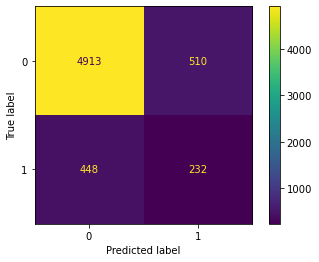

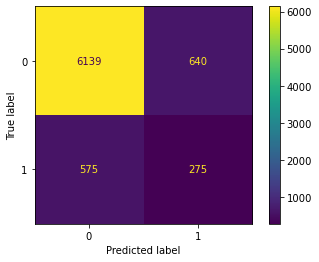

In [132]:
# Decision Tree Classifier
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

classifier_dt = tree.DecisionTreeClassifier(random_state=15)
classifier_dt.fit(X_train, y_train)

#using both confusion_matrix and plot_confusion_matrix functions as the latter is deprecated, both give same results though

y_dt_val_pred = classifier_dt.predict(X_val)
cm_dt_val=confusion_matrix(y_val, y_dt_val_pred)
plot_confusion_matrix(classifier_dt,X_val,y_val)
print("Confusion Matrix for Validation set using Decision Tree classifer:\n",cm_dt_val)
print("F1 Score for Validation set using Decision Tree classifer:",f1_score(y_val, y_dt_val_pred))

y_dt_test_pred=classifier_dt.predict(X_test)
cm_dt_test=confusion_matrix(y_test, y_dt_test_pred)
plot_confusion_matrix(classifier_dt,X_test,y_test)
print("Confusion Matrix for Test set using Decision Tree classifer:\n",cm_dt_test)
print("F1 Score for Test set using Decision Tree classifer:",f1_score(y_test, y_dt_test_pred))

Confusion Matrix for Validation set using Logistic Regression classifer:
 [[5350   73]
 [ 515  165]]
F1 Score for Validation set using Logistic Regression classifer: 0.35947712418300654
Confusion Matrix for Test set using Logistic Regression classifer:
 [[6684   95]
 [ 694  156]]
F1 Score for test set using Logistic Regression classifer: 0.28337874659400547


/Users/pratikgawli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pratikgawli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/pratikgawli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils

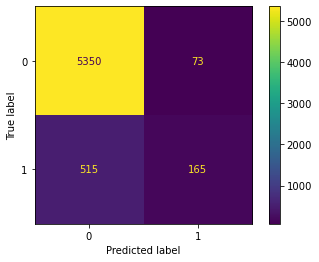

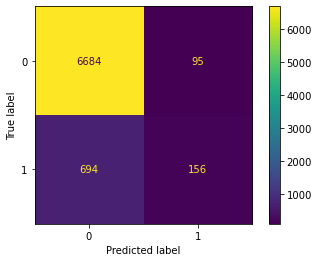

In [133]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=15)
classifier_lr.fit(X_train, y_train)

y_lr_val_pred = classifier_lr.predict(X_val)
cm_lr_val=confusion_matrix(y_val, y_lr_val_pred)
plot_confusion_matrix(classifier_lr,X_val,y_val)
print("Confusion Matrix for Validation set using Logistic Regression classifer:\n",cm_lr_val)
print("F1 Score for Validation set using Logistic Regression classifer:",f1_score(y_val, y_lr_val_pred))

y_lr_test_pred=classifier_lr.predict(X_test)
cm_lr_test=confusion_matrix(y_test, y_lr_test_pred)
plot_confusion_matrix(classifier_lr,X_test,y_test)
print("Confusion Matrix for Test set using Logistic Regression classifer:\n",cm_lr_test)
print("F1 Score for test set using Logistic Regression classifer:",f1_score(y_test, y_lr_test_pred))

/Users/pratikgawli/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pratikgawli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/pratikgawli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warni

Confusion Matrix for Validation set using MLP classifer:
 [[5320  103]
 [ 511  169]]
F1 Score for Validation set using MLP classifer: 0.3550420168067227
Confusion Matrix for Test set using MLP classifer:
 [[6637  142]
 [ 656  194]]
F1 Score for test set using MLP classifer: 0.327150084317032


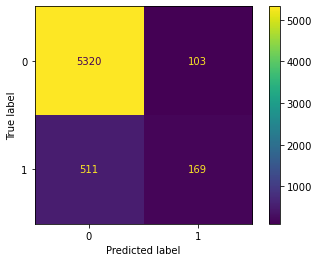

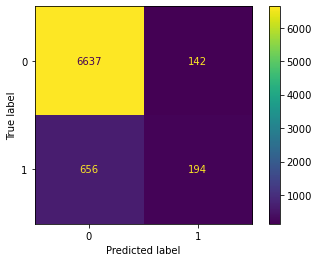

In [136]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier

classifier_mlp = MLPClassifier(random_state=15)
classifier_mlp.fit(X_train, y_train)

y_mlp_val_pred = classifier_mlp.predict(X_val)
cm_mlp_val=confusion_matrix(y_val, y_mlp_val_pred)
plot_confusion_matrix(classifier_mlp,X_val,y_val)
print("Confusion Matrix for Validation set using MLP classifer:\n",cm_mlp_val)
print("F1 Score for Validation set using MLP classifer:",f1_score(y_val, y_mlp_val_pred))

y_mlp_test_pred=classifier_mlp.predict(X_test)
cm_mlp_test=confusion_matrix(y_test, y_mlp_test_pred)
plot_confusion_matrix(classifier_mlp,X_test,y_test)
print("Confusion Matrix for Test set using MLP classifer:\n",cm_mlp_test)
print("F1 Score for test set using MLP classifer:",f1_score(y_test, y_mlp_test_pred))


ROC curves for validation set for all three classifiers: 


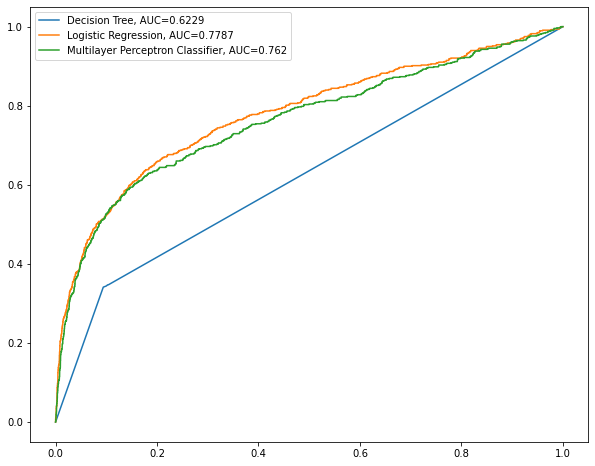

In [137]:
# Plot ROC curves - for validation set
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import roc_auc_score
plt.figure(figsize = (10,8))
print("ROC curves for validation set for all three classifiers: ")
dt_val_probs = classifier_dt.predict_proba(X_val)
dt_val_probs = dt_val_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_val, dt_val_probs)
auc = round(metrics.roc_auc_score(y_val, dt_val_probs), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

lr_val_probs = classifier_lr.predict_proba(X_val)
lr_val_probs = lr_val_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_val, lr_val_probs)
auc = round(metrics.roc_auc_score(y_val, lr_val_probs), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

mlp_val_probs = classifier_mlp.predict_proba(X_val)
mlp_val_probs = mlp_val_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_val, mlp_val_probs)
auc = round(metrics.roc_auc_score(y_val, mlp_val_probs), 4)
plt.plot(fpr,tpr,label="Multilayer Perceptron Classifier, AUC="+str(auc))

plt.legend()

ROC curves for test set for all three classifiers: 


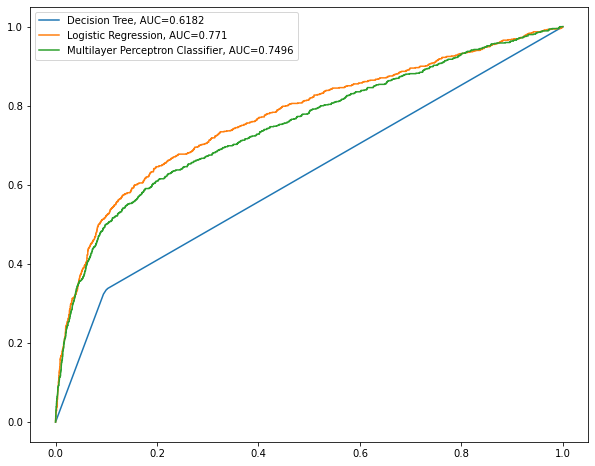

In [138]:
# Plot ROC curves - for test set
plt.figure(figsize = (10,8))
print("ROC curves for test set for all three classifiers: ")
dt_probs = classifier_dt.predict_proba(X_test)
dt_probs = dt_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, dt_probs)
auc = round(metrics.roc_auc_score(y_test, dt_probs), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

lr_probs = classifier_lr.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, lr_probs)
auc = round(metrics.roc_auc_score(y_test, lr_probs), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

mlp_probs = classifier_mlp.predict_proba(X_test)
mlp_probs = mlp_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, mlp_probs)
auc = round(metrics.roc_auc_score(y_test, mlp_probs), 4)
plt.plot(fpr,tpr,label="Multilayer Perceptron Classifier, AUC="+str(auc))

plt.legend()

/Users/pratikgawli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/pratikgawli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/pratikgawli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_re

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

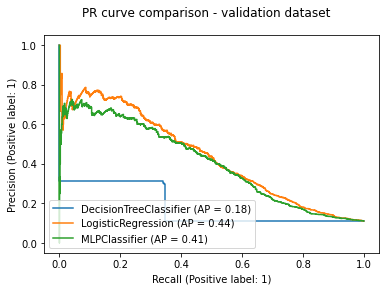

In [139]:
# Plot PR curves -  for validation set
plt.figure(figsize = (10,8))
from sklearn.metrics import precision_recall_curve
plt.figure(figsize = (10,8))
fig = plot_precision_recall_curve(classifier_dt, X_val, y_val)
fig = plot_precision_recall_curve(classifier_lr, X_val, y_val, ax = fig.ax_)
fig = plot_precision_recall_curve(classifier_mlp, X_val, y_val, ax = fig.ax_)
fig.figure_.suptitle("PR curve comparison - validation dataset")
plt.show()

/Users/pratikgawli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/pratikgawli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/pratikgawli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_re

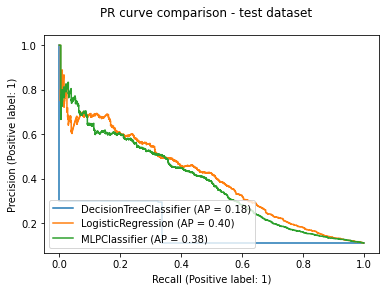

In [140]:
fig = plot_precision_recall_curve(classifier_dt, X_test, y_test)
fig = plot_precision_recall_curve(classifier_lr, X_test, y_test, ax = fig.ax_)
fig = plot_precision_recall_curve(classifier_mlp, X_test, y_test, ax = fig.ax_)
fig.figure_.suptitle("PR curve comparison - test dataset")
plt.show()

In [141]:

X = df3.drop('subscribed',axis='columns')
y = df3['subscribed']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state= 15)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=10)
X_res, y_res = sm.fit_resample(X_train, y_train)
# Answer here
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res,stratify=y_res, test_size=0.20, random_state= 15)  

In [142]:
y_val.value_counts()

1    5423
0    5423
Name: subscribed, dtype: int64

In [143]:
y_test.value_counts() 

0    6779
1     850
Name: subscribed, dtype: int64

In [68]:
df3.to_csv('data.csv', index=False)

In [69]:
df3.describe()

,age,housing,loan,contact,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,married,single,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,nonexistent,success
count,38144.000000,38144.000000,38144.000000,38144.000000,38144.000000,38144.000000,38144.000000,38144.000000,38144.000000,38144.000000,...,38144.000000,38144.000000,38144.000000,38144.000000,38144.000000,38144.000000,38144.000000,38144.000000,38144.000000,38144.000000
mean,0.282311,0.538066,0.156145,0.638580,0.037383,0.024258,0.726127,0.533936,0.429250,0.678294,...,0.606019,0.281224,0.057729,0.153104,0.242030,0.000472,0.133284,0.308699,0.864802,0.032482
std,0.127036,0.498555,0.362998,0.480418,0.065956,0.069582,0.326021,0.224532,0.193317,0.392041,...,0.488637,0.449602,0.233233,0.360092,0.428318,0.021718,0.339886,0.461963,0.341940,0.177279
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185185,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.340608,0.338912,0.160961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.259259,1.000000,0.000000,1.000000,0.023810,0.000000,0.937500,0.484412,0.376569,0.957379,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.370370,1.000000,0.000000,1.000000,0.047619,0.000000,1.000000,0.698753,0.602510,0.980957,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
#running on excel, found these variables to be most significant
imp_parameters=['contact','campaign',"emp.var.rate","cons.price.idx","cons.conf.idx","blue-collar","retired","services","student","university.degree","subscribed"]

In [71]:
imp_parameters

['contact',
 'campaign',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'blue-collar',
 'retired',
 'services',
 'student',
 'university.degree',
 'subscribed']

In [72]:
impdf=df3[imp_parameters]

In [73]:
impdf.to_csv("impdata.csv", index=False)

In [74]:
# Train test split
from sklearn.model_selection import train_test_split
X = impdf.drop('subscribed',axis='columns')
y = impdf['subscribed']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state= 15)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,stratify=y_train, test_size=0.20, random_state= 15) 

In [75]:
print('subscribed occurences in the training set \n', y_train.value_counts())
print('\n')
print('subscribed occurences throughout the data \n', y.value_counts())

subscribed occurences in the training set 
 0.0    21691
1.0     2721
Name: subscribed, dtype: int64


subscribed occurences throughout the data 
 0.0    33893
1.0     4251
Name: subscribed, dtype: int64


Confusion Matrix for Validation set using Decision Tree classifer:
 [[5263  160]
 [ 524  156]]
F1 Score for Validation set using Decision Tree classifer: 0.3132530120481927
Confusion Matrix for Test set using Decision Tree classifer:
 [[6606  173]
 [ 673  177]]
F1 Score for Test set using Decision Tree classifer: 0.29499999999999993


/Users/pratikgawli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/pratikgawli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


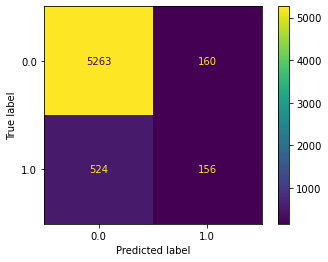

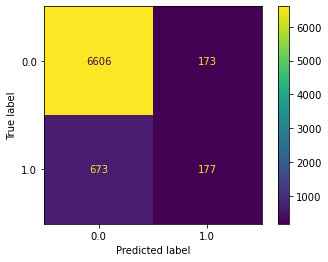

In [76]:
# Decision Tree Classifier
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

classifier_dt = tree.DecisionTreeClassifier(random_state=15)
classifier_dt.fit(X_train, y_train)

#using both confusion_matrix and plot_confusion_matrix functions as the latter is deprecated, both give same results though

y_dt_val_pred = classifier_dt.predict(X_val)
cm_dt_val=confusion_matrix(y_val, y_dt_val_pred)
plot_confusion_matrix(classifier_dt,X_val,y_val)
print("Confusion Matrix for Validation set using Decision Tree classifer:\n",cm_dt_val)
print("F1 Score for Validation set using Decision Tree classifer:",f1_score(y_val, y_dt_val_pred))

y_dt_test_pred=classifier_dt.predict(X_test)
cm_dt_test=confusion_matrix(y_test, y_dt_test_pred)
plot_confusion_matrix(classifier_dt,X_test,y_test)
print("Confusion Matrix for Test set using Decision Tree classifer:\n",cm_dt_test)
print("F1 Score for Test set using Decision Tree classifer:",f1_score(y_test, y_dt_test_pred))

Confusion Matrix for Validation set using Logistic Regression classifer:
 [[5298  125]
 [ 525  155]]
F1 Score for Validation set using Logistic Regression classifer: 0.32291666666666663
Confusion Matrix for Test set using Logistic Regression classifer:
 [[6616  163]
 [ 688  162]]
F1 Score for test set using Logistic Regression classifer: 0.27574468085106385


/Users/pratikgawli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/pratikgawli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


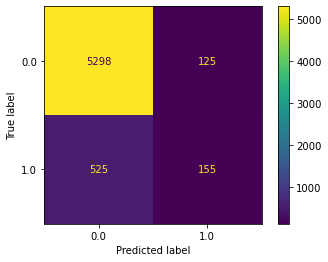

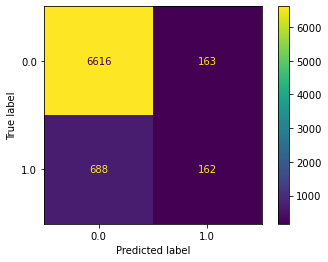

In [77]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=15)
classifier_lr.fit(X_train, y_train)

y_lr_val_pred = classifier_lr.predict(X_val)
cm_lr_val=confusion_matrix(y_val, y_lr_val_pred)
plot_confusion_matrix(classifier_lr,X_val,y_val)
print("Confusion Matrix for Validation set using Logistic Regression classifer:\n",cm_lr_val)
print("F1 Score for Validation set using Logistic Regression classifer:",f1_score(y_val, y_lr_val_pred))

y_lr_test_pred=classifier_lr.predict(X_test)
cm_lr_test=confusion_matrix(y_test, y_lr_test_pred)
plot_confusion_matrix(classifier_lr,X_test,y_test)
print("Confusion Matrix for Test set using Logistic Regression classifer:\n",cm_lr_test)
print("F1 Score for test set using Logistic Regression classifer:",f1_score(y_test, y_lr_test_pred))

/Users/pratikgawli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/pratikgawli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix for Validation set using MLP classifer:
 [[5295  128]
 [ 534  146]]
F1 Score for Validation set using MLP classifer: 0.3060796645702306
Confusion Matrix for Test set using MLP classifer:
 [[6626  153]
 [ 675  175]]
F1 Score for test set using MLP classifer: 0.29711375212224106


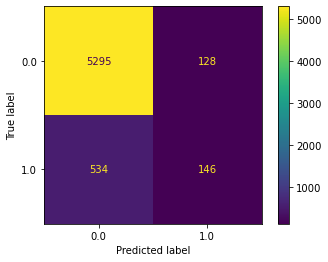

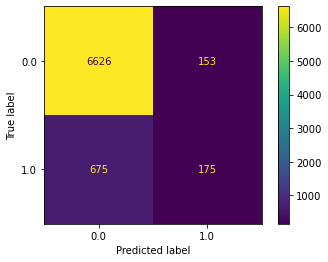

In [78]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier

classifier_mlp = MLPClassifier(random_state=15)
classifier_mlp.fit(X_train, y_train)

y_mlp_val_pred = classifier_mlp.predict(X_val)
cm_mlp_val=confusion_matrix(y_val, y_mlp_val_pred)
plot_confusion_matrix(classifier_mlp,X_val,y_val)
print("Confusion Matrix for Validation set using MLP classifer:\n",cm_mlp_val)
print("F1 Score for Validation set using MLP classifer:",f1_score(y_val, y_mlp_val_pred))

y_mlp_test_pred=classifier_mlp.predict(X_test)
cm_mlp_test=confusion_matrix(y_test, y_mlp_test_pred)
plot_confusion_matrix(classifier_mlp,X_test,y_test)
print("Confusion Matrix for Test set using MLP classifer:\n",cm_mlp_test)
print("F1 Score for test set using MLP classifer:",f1_score(y_test, y_mlp_test_pred))


ROC curves for validation set for all three classifiers: 


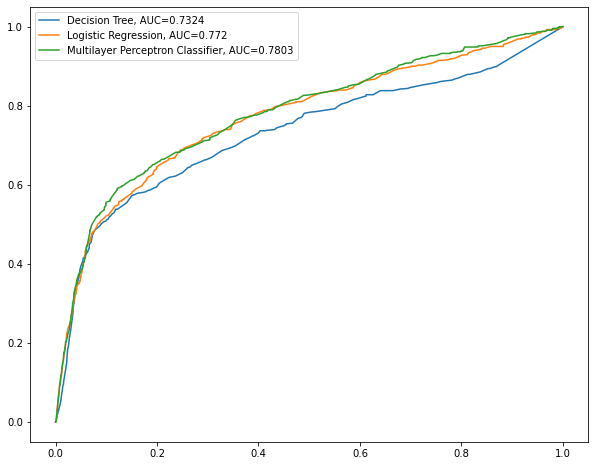

In [79]:

plt.figure(figsize = (10,8))
print("ROC curves for validation set for all three classifiers: ")
dt_val_probs = classifier_dt.predict_proba(X_val)
dt_val_probs = dt_val_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_val, dt_val_probs)
auc = round(metrics.roc_auc_score(y_val, dt_val_probs), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

lr_val_probs = classifier_lr.predict_proba(X_val)
lr_val_probs = lr_val_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_val, lr_val_probs)
auc = round(metrics.roc_auc_score(y_val, lr_val_probs), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

mlp_val_probs = classifier_mlp.predict_proba(X_val)
mlp_val_probs = mlp_val_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_val, mlp_val_probs)
auc = round(metrics.roc_auc_score(y_val, mlp_val_probs), 4)
plt.plot(fpr,tpr,label="Multilayer Perceptron Classifier, AUC="+str(auc))

plt.legend()

ROC curves for test set for all three classifiers: 


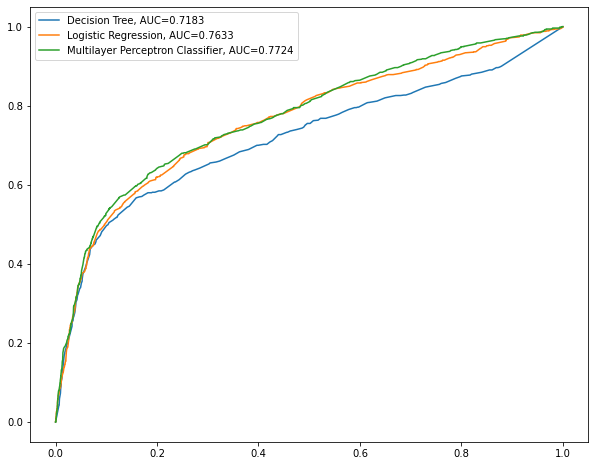

In [80]:
plt.figure(figsize = (10,8))
print("ROC curves for test set for all three classifiers: ")
dt_probs = classifier_dt.predict_proba(X_test)
dt_probs = dt_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, dt_probs)
auc = round(metrics.roc_auc_score(y_test, dt_probs), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

lr_probs = classifier_lr.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, lr_probs)
auc = round(metrics.roc_auc_score(y_test, lr_probs), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

mlp_probs = classifier_mlp.predict_proba(X_test)
mlp_probs = mlp_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, mlp_probs)
auc = round(metrics.roc_auc_score(y_test, mlp_probs), 4)
plt.plot(fpr,tpr,label="Multilayer Perceptron Classifier, AUC="+str(auc))

plt.legend()

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state= 15)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=10)
X_res, y_res = sm.fit_resample(X_train, y_train)
# Answer here
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res,stratify=y_res, test_size=0.20, random_state= 15) 

/Users/pratikgawli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/pratikgawli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix for Validation set using Decision Tree classifer:
 [[4808  615]
 [1786 3637]]
F1 Score for Validation set using Decision Tree classifer: 0.7518346253229974
Confusion Matrix for Test set using Decision Tree classifer:
 [[5974  805]
 [ 428  422]]
F1 Score for Test set using Decision Tree classifer: 0.4063553201733269


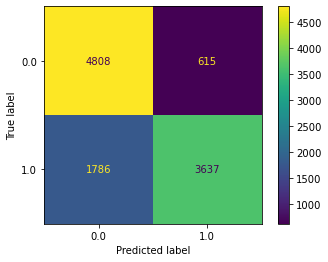

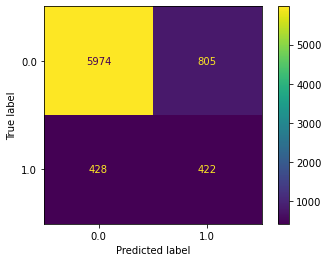

In [82]:
# Decision Tree Classifier
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

classifier_dt = tree.DecisionTreeClassifier(random_state=15)
classifier_dt.fit(X_train, y_train)

#using both confusion_matrix and plot_confusion_matrix functions as the latter is deprecated, both give same results though

y_dt_val_pred = classifier_dt.predict(X_val)
cm_dt_val=confusion_matrix(y_val, y_dt_val_pred)
plot_confusion_matrix(classifier_dt,X_val,y_val)
print("Confusion Matrix for Validation set using Decision Tree classifer:\n",cm_dt_val)
print("F1 Score for Validation set using Decision Tree classifer:",f1_score(y_val, y_dt_val_pred))

y_dt_test_pred=classifier_dt.predict(X_test)
cm_dt_test=confusion_matrix(y_test, y_dt_test_pred)
plot_confusion_matrix(classifier_dt,X_test,y_test)
print("Confusion Matrix for Test set using Decision Tree classifer:\n",cm_dt_test)
print("F1 Score for Test set using Decision Tree classifer:",f1_score(y_test, y_dt_test_pred))

Confusion Matrix for Validation set using Logistic Regression classifer:
 [[4201 1222]
 [1780 3643]]
F1 Score for Validation set using Logistic Regression classifer: 0.7082037325038879
Confusion Matrix for Test set using Logistic Regression classifer:
 [[5194 1585]
 [ 291  559]]
F1 Score for test set using Logistic Regression classifer: 0.3734134936539747


/Users/pratikgawli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/pratikgawli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


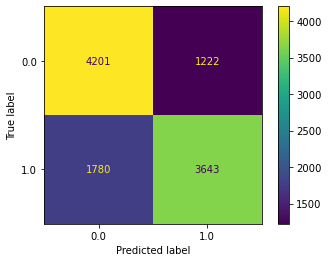

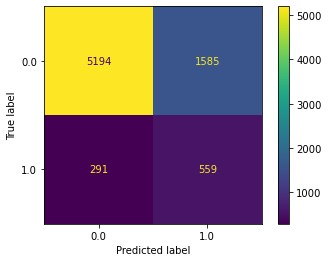

In [83]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=15)
classifier_lr.fit(X_train, y_train)

y_lr_val_pred = classifier_lr.predict(X_val)
cm_lr_val=confusion_matrix(y_val, y_lr_val_pred)
plot_confusion_matrix(classifier_lr,X_val,y_val)
print("Confusion Matrix for Validation set using Logistic Regression classifer:\n",cm_lr_val)
print("F1 Score for Validation set using Logistic Regression classifer:",f1_score(y_val, y_lr_val_pred))

y_lr_test_pred=classifier_lr.predict(X_test)
cm_lr_test=confusion_matrix(y_test, y_lr_test_pred)
plot_confusion_matrix(classifier_lr,X_test,y_test)
print("Confusion Matrix for Test set using Logistic Regression classifer:\n",cm_lr_test)
print("F1 Score for test set using Logistic Regression classifer:",f1_score(y_test, y_lr_test_pred))

/Users/pratikgawli/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pratikgawli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/pratikgawli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warni

Confusion Matrix for Validation set using MLP classifer:
 [[4652  771]
 [1987 3436]]
F1 Score for Validation set using MLP classifer: 0.7136033229491174
Confusion Matrix for Test set using MLP classifer:
 [[5807  972]
 [ 358  492]]
F1 Score for test set using MLP classifer: 0.4252376836646499


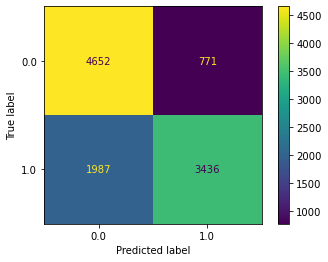

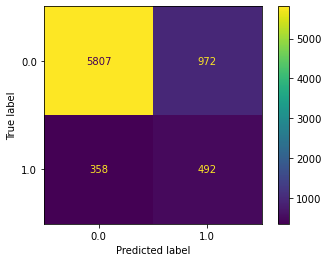

In [84]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier

classifier_mlp = MLPClassifier(random_state=15)
classifier_mlp.fit(X_train, y_train)

y_mlp_val_pred = classifier_mlp.predict(X_val)
cm_mlp_val=confusion_matrix(y_val, y_mlp_val_pred)
plot_confusion_matrix(classifier_mlp,X_val,y_val)
print("Confusion Matrix for Validation set using MLP classifer:\n",cm_mlp_val)
print("F1 Score for Validation set using MLP classifer:",f1_score(y_val, y_mlp_val_pred))

y_mlp_test_pred=classifier_mlp.predict(X_test)
cm_mlp_test=confusion_matrix(y_test, y_mlp_test_pred)
plot_confusion_matrix(classifier_mlp,X_test,y_test)
print("Confusion Matrix for Test set using MLP classifer:\n",cm_mlp_test)
print("F1 Score for test set using MLP classifer:",f1_score(y_test, y_mlp_test_pred))


ROC curves for validation set for all three classifiers: 


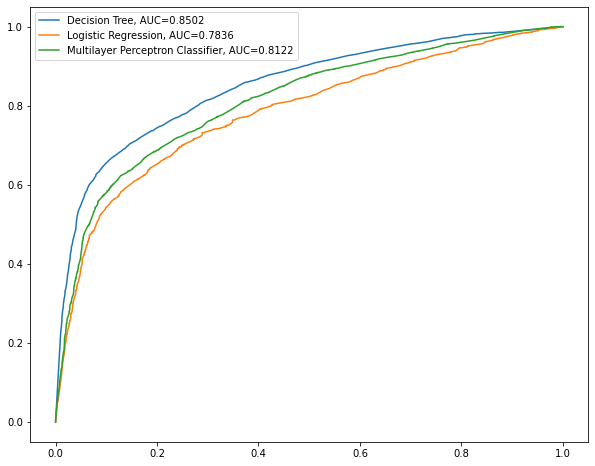

In [85]:

plt.figure(figsize = (10,8))
print("ROC curves for validation set for all three classifiers: ")
dt_val_probs = classifier_dt.predict_proba(X_val)
dt_val_probs = dt_val_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_val, dt_val_probs)
auc = round(metrics.roc_auc_score(y_val, dt_val_probs), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

lr_val_probs = classifier_lr.predict_proba(X_val)
lr_val_probs = lr_val_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_val, lr_val_probs)
auc = round(metrics.roc_auc_score(y_val, lr_val_probs), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

mlp_val_probs = classifier_mlp.predict_proba(X_val)
mlp_val_probs = mlp_val_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_val, mlp_val_probs)
auc = round(metrics.roc_auc_score(y_val, mlp_val_probs), 4)
plt.plot(fpr,tpr,label="Multilayer Perceptron Classifier, AUC="+str(auc))

plt.legend()

ROC curves for test set for all three classifiers: 


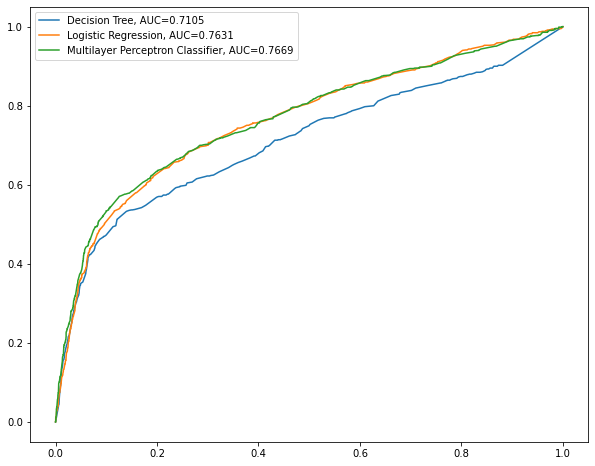

In [86]:
plt.figure(figsize = (10,8))
print("ROC curves for test set for all three classifiers: ")
dt_probs = classifier_dt.predict_proba(X_test)
dt_probs = dt_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, dt_probs)
auc = round(metrics.roc_auc_score(y_test, dt_probs), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

lr_probs = classifier_lr.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, lr_probs)
auc = round(metrics.roc_auc_score(y_test, lr_probs), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

mlp_probs = classifier_mlp.predict_proba(X_test)
mlp_probs = mlp_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, mlp_probs)
auc = round(metrics.roc_auc_score(y_test, mlp_probs), 4)
plt.plot(fpr,tpr,label="Multilayer Perceptron Classifier, AUC="+str(auc))

plt.legend()